# Análise Fatorial Exploratória

Nesta atividade iremos trabalho com um conjunto de dados od [ifood](https://www.kaggle.com/datasets/jackdaoud/marketing-data). Este conjunto sofreu um pre tratamento para podermos focar mais na análise fatorial.

## Atividade 1: Importe os dados e verifique se há dados faltantes. Se houver dados faltantes, faça os tratamentos adequados. 

In [28]:
# Importando a biblioteca pandas
import pandas as pd
import numpy as np

In [29]:
# Carregando os dados do arquivo Excel
df = pd.read_excel('ifood2 - base.xlsx')

# Exibindo as primeiras linhas do DataFrame
df.head()

,ID,ano_nascimento,nivel_educacao,estado_civil,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,...,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,6862,1971,graduado,divorciado,650.38,0,0,42,65,1,...,3,1,1,15,0,0,0,20,0,0
1,5376,1979,graduado,casado,919.92,1,0,539,42,1,...,1725,1,1,15,0,28,0,1,0,0
2,11110,1973,graduado,solteiro,1316.54,1,0,442,56,2,...,1,0,0,0,0,0,0,14,0,0
3,9931,1963,doutorado,casado,1512.41,1,1,6,29,5,...,1,1,1,15,0,0,0,19,0,0
4,10311,1969,graduado,casado,1664.66,0,1,267,0,16,...,12,2,4,0,25,0,0,1,0,0


In [30]:
# Verificando se há dados faltantes
missing_data = df.isnull().sum()
missing_data

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

## Atividade 2: Faça uma preparação dos dados, isto é, elimine colunas irrelevantes e transforme colunas categóricas usando One Hot Encoding.

In [31]:
df['nivel_educacao'].unique()

array(['graduado', 'doutorado', 'mestrado', 'ensino_medio', 'pos'],
      dtype=object)

In [32]:
# Cria um mapeamento entre as categorias originais e as novas categorias numéricas
education_mapping = {
    'ensino_medio': 1,
    'graduado': 2,
    'pos': 3,
    'mestrado': 4,
    'doutorado': 5
}

# Aplica o mapeamento à coluna 'nivel_educacao'
df['nivel_educacao'] = df['nivel_educacao'].map(education_mapping)

# Verifica os valores únicos na coluna 'nivel_educacao'
df['nivel_educacao'].unique()

array([2, 5, 4, 1, 3], dtype=int64)

In [33]:
data = df.drop(['ID','estado_civil'], axis=1)

In [34]:
#data_encoded = pd.get_dummies(data, columns=['nivel_educacao', 'estado_civil'])
data_encoded = data.copy()
data_encoded.head()

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,1971,2,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0,0
1,1979,2,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0,0
2,1973,2,1316.54,1,0,442,56,2,1,1,0,0,0,0,0,0,14,0,0
3,1963,5,1512.41,1,1,6,29,5,0,1,1,1,15,0,0,0,19,0,0
4,1969,2,1664.66,0,1,267,0,16,4,12,2,4,0,25,0,0,1,0,0


In [35]:
# seu código

In [36]:
# seu código

In [37]:
# seu código

In [38]:
# seu código

In [39]:
# seu código

## Atividade 3: Coloque os dados numa mesma escala e faça um heatmap para observar a correlação.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

data_encoded.head()

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,0.183962,-0.819614,-2.010675,-0.826459,-0.929785,-1.541122,0.547625,-0.899264,-0.635710,-0.726203,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,6.056590,-0.501375,-0.097369
1,0.851858,-0.819614,-1.982125,1.030790,-0.929785,0.919043,-0.246892,-0.899264,-0.635710,6.902445,-0.668911,-0.631638,6.562937,-1.469078,8.678058,-1.779682,-1.781003,-0.501375,-0.097369
2,0.350936,-0.819614,-1.940113,1.030790,-0.929785,0.438890,0.236727,-0.896295,-0.635710,-0.735063,-0.687285,-0.655856,-1.202564,-1.469078,-0.910659,-1.779682,3.581561,-0.501375,-0.097369
3,-0.483933,1.530950,-1.919366,1.030790,0.906787,-1.719323,-0.695967,-0.887388,-0.660865,-0.735063,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,5.644085,-0.501375,-0.097369
4,0.016989,-0.819614,-1.903240,-0.826459,0.906787,-0.427365,-1.697749,-0.854727,-0.560242,-0.686332,-0.650537,-0.558984,-1.202564,7.526593,-0.910659,-1.779682,-1.781003,-0.501375,-0.097369


<Axes: >

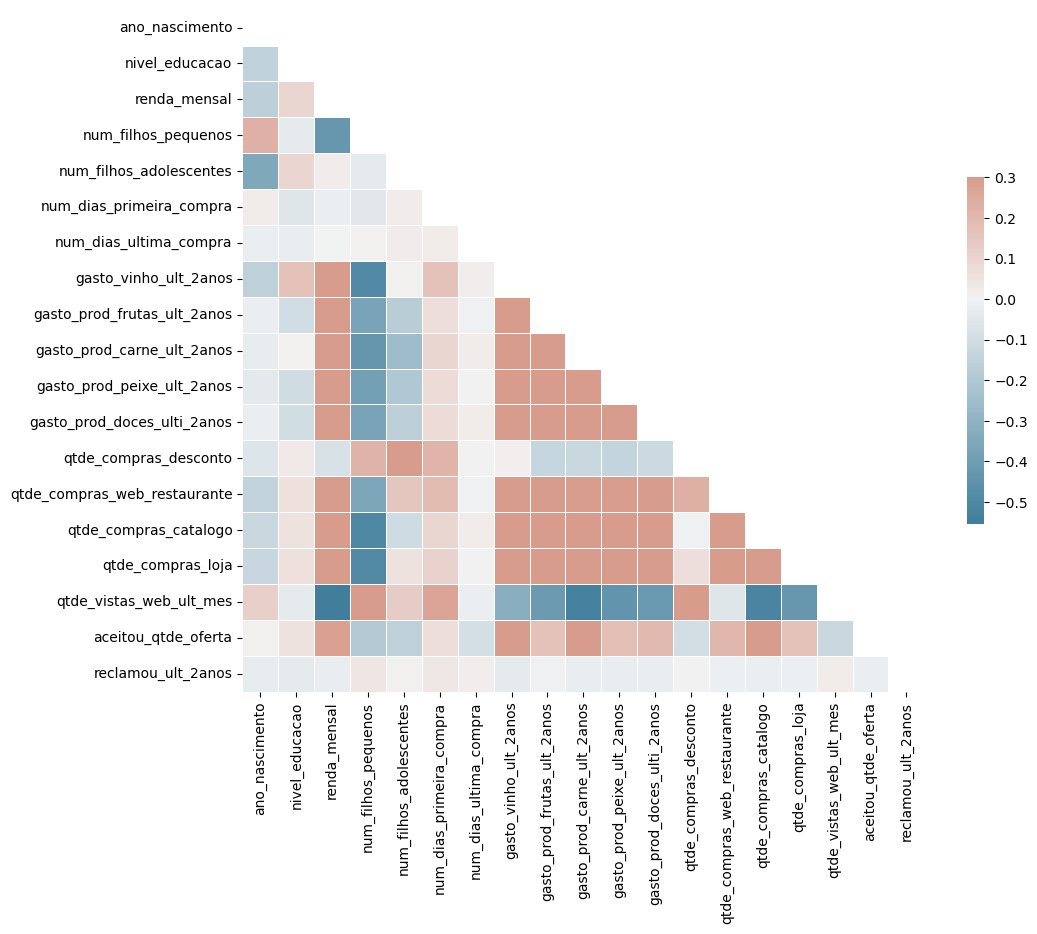

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data_encoded.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Atividade 4: Há um grupo de variáveis que trazem informações muito parecidas e possuem correlação entre si. Transforme todas essas variáveis em uma única.

In [42]:
# seu código

In [43]:
# seu código

## Atividade 5: Faça e teste de esfericidade de Bartlett e conclua se as variáveis estão correlacionadas.

Para realizar esse teste em `Python` usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando `!pip install factor_analyzer`.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`.

Para mais detalhes consulte a documentação do pacote [aqui](https://factor-analyzer.readthedocs.io/en/latest/index.html).

Está função retornará para nós dois valores: a estatística qui quadrado do teste e o p-valor. Consideraremos um nível de significância de 5%.

In [44]:
#!pip install factor_analyzer

In [45]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value, p_value = calculate_bartlett_sphericity(data_encoded)

print("Chi-square value:", chi_square_value)
print("p-value:", p_value)

Chi-square value: 16622.653196246276
p-value: 0.0


## Atividade 6: Obtenha a medida de Kaiser-Meyer-Olkin e conclua se a análise fatorial é indicada.

Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.
KMO sempre varia entre 0 e 1, quanto maior melhor. Resultados abaixo de 0.5 indicam que análise fatorial não é adequada.

In [46]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(data_encoded)

print("KMO:", kmo_model)

KMO: 0.8709431708762012


## Atividade 7: Encontre o número adequado de fatores para este problema.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe `FactorAnalyzer`, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

In [47]:
# importando a função FactorAnalyzer
from factor_analyzer import FactorAnalyzer

# criando um objeto para fazer análise fatorial
fa = FactorAnalyzer(rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(data_encoded)

# obtendo os autovalores
ev, v = fa.get_eigenvalues()
ev

array([5.92464367, 2.03606055, 1.49382555, 1.22735748, 1.00737241,
       0.99391334, 0.85227948, 0.7984439 , 0.72004645, 0.6456512 ,
       0.51507517, 0.46943965, 0.45268429, 0.41669992, 0.39275903,
       0.31148663, 0.28766811, 0.25058856, 0.20400461])

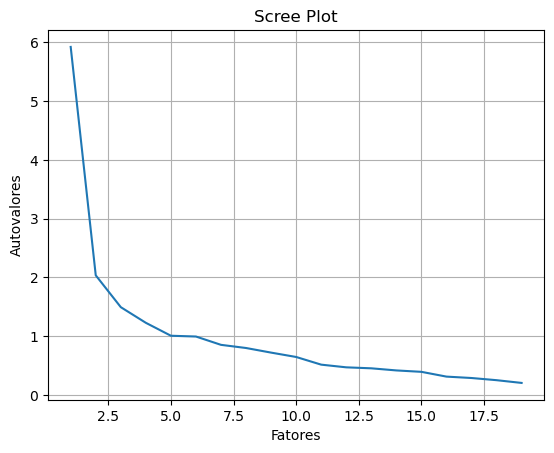

In [48]:
# importando matplotlib para fazer algumas customizações no gráfico
import matplotlib.pyplot as plt

# Criando um scree plot
sns.lineplot(x=range(1, data_encoded.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')
plt.grid();

## Atividade 8: Calcule a variância explicada acumulada.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realizaação da análise fatorial.

In [49]:
# criando um objeto para fazer análise fatorial com 4 fatores
fa = FactorAnalyzer(n_factors=3, rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(data_encoded)

# criando nome para as colunas do DataFrame de cargas fatoriais
colunas = []
for i in range(3):
  colunas.append('Fator ' + str(i))

# criando DataFrame para auxiliar a visualização do resultado
variancia_fator = pd.DataFrame(fa.get_factor_variance(),
                   index=['Variância','Variância Proporcional','Variância Acumulada'],
                   columns=colunas)

variancia_fator

,Fator 0,Fator 1,Fator 2
Variância,5.494175,1.501873,0.910552
Variância Proporcional,0.289167,0.079046,0.047924
Variância Acumulada,0.289167,0.368213,0.416137


### Comunalidades

Comunalidade é a proporção da variância de cada variável que pode ser explicada pelos fatores. Rotação não tem influência nas comunalidades.

In [50]:
pd.DataFrame(fa.get_communalities(),
             index=data_encoded.columns,
             columns=['Comunalidades'])

,Comunalidades
ano_nascimento,0.243040
nivel_educacao,0.074040
renda_mensal,0.565555
num_filhos_pequenos,0.424513
num_filhos_adolescentes,0.515184
num_dias_primeira_compra,0.238164
num_dias_ultima_compra,0.000206
gasto_vinho_ult_2anos,0.658836
gasto_prod_frutas_ult_2anos,0.479562
gasto_prod_carne_ult_2anos,0.664627


## Atividade 9: Rotacione os fatores.

Como estamos trabalhando com fatores que influenciam cliente, é interessante não ter um número muito grande, por isso vamos usar 4 fatores na análise a seguir.

Esse processo pode ser feito de forma simples ao passar para a função `FactorAnalyzer()` os parâmetros de interesse, que no nosso caso são `n_factors` e `rotation='varimax`.

Após expor nosso objeto aos dados, vamos acessar o atributo `loadinds_` que possui as cargas fatoriais.

In [51]:
# realizando a análise fatorial com rotação
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(data_encoded)

# criando DataFrame de cargas fatoriais
cargas_fat = pd.DataFrame(fa.loadings_,
                          index=data_encoded.columns,
                          columns=colunas)
cargas_fat

,Fator 0,Fator 1,Fator 2
ano_nascimento,-0.088301,-0.005248,-0.484990
nivel_educacao,0.002799,0.002190,0.272079
renda_mensal,0.697876,-0.107573,0.258752
num_filhos_pequenos,-0.593194,0.105080,-0.248178
num_filhos_adolescentes,-0.185813,0.268353,0.639253
num_dias_primeira_compra,0.130072,0.452647,-0.127890
num_dias_ultima_compra,0.003637,-0.004543,0.013124
gasto_vinho_ult_2anos,0.747254,0.213676,0.234074
gasto_prod_frutas_ult_2anos,0.675944,-0.069068,-0.133759
gasto_prod_carne_ult_2anos,0.803299,-0.104903,-0.091286


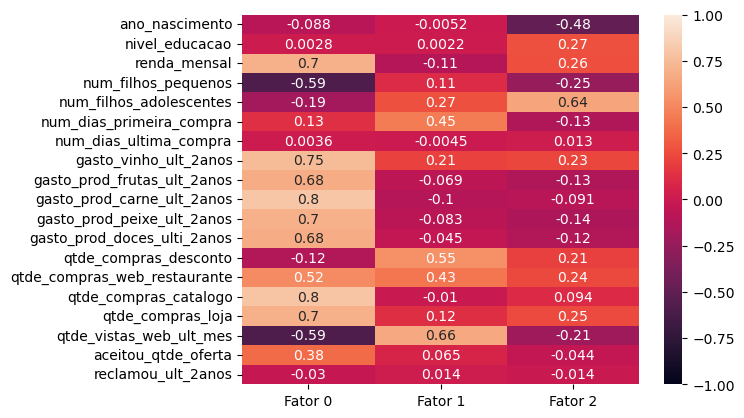

In [52]:
# observando o valor das cargas fatoriais com heatmap
sns.heatmap(cargas_fat, vmin=-1, vmax=1, annot=True);

## Atividade 10: Obtenha a relação de cada fator com as variáveis que ele está influenciando.

Cargas fatoriais indicam quanto um fator explica uma variável. Esses valores variam de -1 a 1. Quanto mais próximo de -1 ou de 1, mais o fator explica a variável.

Vamos estabelecer um valor de corte para poder entender quais fatores explicam quais variáveis. Vamos considerar que esse valor de corte será 0.5.

In [53]:
# criando o dicionário
fatores_variaveis = {}

# preenchendo o dicionário
for i in range(3):
  fatores_variaveis['Fator ' + str(i)] = cargas_fat[cargas_fat.iloc[:,i] > 0.5].iloc[:,i].index.tolist()

fatores_variaveis

{'Fator 0': ['renda_mensal',
  'gasto_vinho_ult_2anos',
  'gasto_prod_frutas_ult_2anos',
  'gasto_prod_carne_ult_2anos',
  'gasto_prod_peixe_ult_2anos',
  'gasto_prod_doces_ulti_2anos',
  'qtde_compras_web_restaurante',
  'qtde_compras_catalogo',
  'qtde_compras_loja'],
 'Fator 1': ['qtde_compras_desconto', 'qtde_vistas_web_ult_mes'],
 'Fator 2': ['num_filhos_adolescentes']}

In [54]:
# seu código

## Atividade 11: Encontre um nome que represente cada fator.

- 'Fator 0': Este fator parece estar relacionado com a renda do cliente e os gastos em várias categorias de produtos, além das compras em restaurantes, catálogos e lojas. Portanto, poderíamos chamá-lo de "Fator de Consumo e Renda".
- 'Fator 1': Este fator parece estar relacionado com as compras com desconto e as visualizações na web, portanto, poderíamos chamá-lo de "Fator de Compras Online e com Desconto".
- 'Fator 2': Este fator está associado ao número de filhos adolescentes, portanto, poderíamos chamá-lo de "Fator de Família com Adolescentes".